In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection

import graphviz

melb_house_prices = pd.read_csv('property_prices.csv')

melb_house_prices.drop(['id'], axis=1, inplace=True)

print(melb_house_prices)

      price_bands      suburb                address  rooms       type method  \
0       200K-400K  Abbotsford     6/241 Nicholson St      1       unit      S   
1       200K-400K  Abbotsford        120/6 Acacia Pl      1       unit     SP   
2       400K-600K  Abbotsford        801/1 Acacia Pl      1       unit      S   
3       400K-600K  Abbotsford     504/12 Trenerry Cr      1       unit     VB   
4       400K-600K  Abbotsford    119/52 Nicholson St      1       unit      S   
5       400K-600K  Abbotsford     5/20 Abbotsford St      1       unit     SP   
6       400K-600K  Abbotsford     7/20 Abbotsford St      1       unit     SP   
7       400K-600K  Abbotsford    116/56 Nicholson St      1       unit      S   
8       400K-600K  Abbotsford        11/205 Gipps St      1       unit      S   
9       400K-600K  Abbotsford      65/80 Trenerry Cr      1       unit      S   
10      400K-600K  Abbotsford         5/29 Church St      2       unit      S   
11      400K-600K  Abbotsfor

In [3]:
pd.DataFrame.max(melb_house_prices)

price_bands                                 Unknown
suburb                                     viewbank
address                               9b Stewart St
rooms                                            16
type                                           unit
method                                            W
realestate_agent                        voglwalpole
date                                         9/9/17
distance                                       48.1
postcode                                       3978
bedrooms                                         30
bathrooms                                        12
car_parks                                        26
landsize                                     433014
building_area                                 44515
year_built                                     2106
council_area             Yarra Ranges Shire Council
lattitude                                  -37.3902
longtitude                                  145.526
region_name 

In [4]:
pd.DataFrame.min(melb_house_prices)

price_bands                           0K-200K
suburb                             Abbotsford
address                      1 Abercrombie St
rooms                                       1
type                                    house
method                                     PI
realestate_agent                      @Realty
date                                   1/7/17
distance                                    0
postcode                                 3000
bedrooms                                    0
bathrooms                                   0
car_parks                                   0
landsize                                    0
building_area                               0
year_built                               1196
council_area             Banyule City Council
lattitude                            -38.1904
longtitude                            144.424
region_name              Eastern Metropolitan
suburb_property_count                      83
dtype: object

In [5]:
pd.DataFrame.mean(melb_house_prices)

rooms                       3.031072
distance                   11.185204
postcode                 3116.065645
bedrooms                    3.084647
bathrooms                   1.624798
car_parks                   1.728845
landsize                  593.598993
building_area             160.256400
year_built               1965.289885
lattitude                 -37.810634
longtitude                145.001851
suburb_property_count    7572.888306
dtype: float64

In [6]:
pd.DataFrame.median(melb_house_prices)

rooms                       3.0000
distance                   10.3000
postcode                 3103.0000
bedrooms                    3.0000
bathrooms                   2.0000
car_parks                   2.0000
landsize                  521.0000
building_area             136.0000
year_built               1970.0000
lattitude                 -37.8076
longtitude                145.0078
suburb_property_count    6763.0000
dtype: float64

In [7]:
pd.isna(melb_house_prices)

,price_bands,suburb,address,rooms,type,method,realestate_agent,date,distance,postcode,...,bathrooms,car_parks,landsize,building_area,year_built,council_area,lattitude,longtitude,region_name,suburb_property_count
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,True,True,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,True,True,False,False


In [8]:
melb_house_prices[pd.isna(melb_house_prices).any(axis=1)]

,price_bands,suburb,address,rooms,type,method,realestate_agent,date,distance,postcode,...,bathrooms,car_parks,landsize,building_area,year_built,council_area,lattitude,longtitude,region_name,suburb_property_count
0,200K-400K,Abbotsford,6/241 Nicholson St,1,unit,S,Biggin,8/10/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80080,144.99730,Northern Metropolitan,4019
1,200K-400K,Abbotsford,120/6 Acacia Pl,1,unit,SP,Biggin,14/10/17,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
2,400K-600K,Abbotsford,801/1 Acacia Pl,1,unit,S,Jellis,23/9/17,3.0,3067,...,1.0,1.0,NaN,50.0,2013.0,Yarra City Council,-37.81177,145.01414,Northern Metropolitan,4019
3,400K-600K,Abbotsford,504/12 Trenerry Cr,1,unit,VB,Biggin,10/2/18,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
4,400K-600K,Abbotsford,119/52 Nicholson St,1,unit,S,hockingstuart,22/5/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
5,400K-600K,Abbotsford,5/20 Abbotsford St,1,unit,SP,Greg,22/8/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80160,144.99880,Northern Metropolitan,4019
6,400K-600K,Abbotsford,7/20 Abbotsford St,1,unit,SP,Greg,14/5/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80160,144.99880,Northern Metropolitan,4019
7,400K-600K,Abbotsford,116/56 Nicholson St,1,unit,S,Jellis,22/8/16,2.5,3067,...,1.0,1.0,0.0,50.0,NaN,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019
9,400K-600K,Abbotsford,65/80 Trenerry Cr,1,unit,S,Biggin,19/11/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
11,400K-600K,Abbotsford,106/119 Turner St,1,unit,SP,Purplebricks,10/12/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019


In [9]:
melb_house_prices[pd.isna(melb_house_prices[['price_bands']]).any(axis=1)]

,price_bands,suburb,address,rooms,type,method,realestate_agent,date,distance,postcode,...,bathrooms,car_parks,landsize,building_area,year_built,council_area,lattitude,longtitude,region_name,suburb_property_count


In [10]:
melb_house_prices[pd.isna(melb_house_prices[['rooms']]).any(axis=1)]

,price_bands,suburb,address,rooms,type,method,realestate_agent,date,distance,postcode,...,bathrooms,car_parks,landsize,building_area,year_built,council_area,lattitude,longtitude,region_name,suburb_property_count


In [11]:
melb_house_prices[pd.isna(melb_house_prices[['distance']]).any(axis=1)]

,price_bands,suburb,address,rooms,type,method,realestate_agent,date,distance,postcode,...,bathrooms,car_parks,landsize,building_area,year_built,council_area,lattitude,longtitude,region_name,suburb_property_count


In [12]:
melb_house_prices[pd.isna(melb_house_prices[['postcode']]).any(axis=1)]

,price_bands,suburb,address,rooms,type,method,realestate_agent,date,distance,postcode,...,bathrooms,car_parks,landsize,building_area,year_built,council_area,lattitude,longtitude,region_name,suburb_property_count


In [13]:
melb_house_prices[pd.isna(melb_house_prices[['bathrooms']]).any(axis=1)]

,price_bands,suburb,address,rooms,type,method,realestate_agent,date,distance,postcode,...,bathrooms,car_parks,landsize,building_area,year_built,council_area,lattitude,longtitude,region_name,suburb_property_count
1,200K-400K,Abbotsford,120/6 Acacia Pl,1,unit,SP,Biggin,14/10/17,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
3,400K-600K,Abbotsford,504/12 Trenerry Cr,1,unit,VB,Biggin,10/2/18,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
4,400K-600K,Abbotsford,119/52 Nicholson St,1,unit,S,hockingstuart,22/5/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
9,400K-600K,Abbotsford,65/80 Trenerry Cr,1,unit,S,Biggin,19/11/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
11,400K-600K,Abbotsford,106/119 Turner St,1,unit,SP,Purplebricks,10/12/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
12,400K-600K,Abbotsford,13/84 Trenerry Cr,1,unit,S,Biggin,12/11/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
15,400K-600K,Abbotsford,6/29 Church St,2,unit,S,Biggin,11/11/17,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
16,400K-600K,Abbotsford,403/609 Victoria St,2,unit,S,Dingle,8/10/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
18,600K-800K,Abbotsford,11/328 Johnston St,2,unit,SP,Collings,15/7/17,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
21,600K-800K,Abbotsford,49/84 Trenerry Cr,2,house,S,Biggin,23/4/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019


In [14]:
melb_house_prices[pd.isna(melb_house_prices[['bedrooms']]).any(axis=1)]

,price_bands,suburb,address,rooms,type,method,realestate_agent,date,distance,postcode,...,bathrooms,car_parks,landsize,building_area,year_built,council_area,lattitude,longtitude,region_name,suburb_property_count
1,200K-400K,Abbotsford,120/6 Acacia Pl,1,unit,SP,Biggin,14/10/17,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
3,400K-600K,Abbotsford,504/12 Trenerry Cr,1,unit,VB,Biggin,10/2/18,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
4,400K-600K,Abbotsford,119/52 Nicholson St,1,unit,S,hockingstuart,22/5/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
9,400K-600K,Abbotsford,65/80 Trenerry Cr,1,unit,S,Biggin,19/11/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
11,400K-600K,Abbotsford,106/119 Turner St,1,unit,SP,Purplebricks,10/12/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
12,400K-600K,Abbotsford,13/84 Trenerry Cr,1,unit,S,Biggin,12/11/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
15,400K-600K,Abbotsford,6/29 Church St,2,unit,S,Biggin,11/11/17,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
16,400K-600K,Abbotsford,403/609 Victoria St,2,unit,S,Dingle,8/10/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
18,600K-800K,Abbotsford,11/328 Johnston St,2,unit,SP,Collings,15/7/17,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
21,600K-800K,Abbotsford,49/84 Trenerry Cr,2,house,S,Biggin,23/4/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019


In [15]:
melb_house_prices[pd.isna(melb_house_prices[['car_parks']]).any(axis=1)]

,price_bands,suburb,address,rooms,type,method,realestate_agent,date,distance,postcode,...,bathrooms,car_parks,landsize,building_area,year_built,council_area,lattitude,longtitude,region_name,suburb_property_count
1,200K-400K,Abbotsford,120/6 Acacia Pl,1,unit,SP,Biggin,14/10/17,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
3,400K-600K,Abbotsford,504/12 Trenerry Cr,1,unit,VB,Biggin,10/2/18,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
4,400K-600K,Abbotsford,119/52 Nicholson St,1,unit,S,hockingstuart,22/5/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
9,400K-600K,Abbotsford,65/80 Trenerry Cr,1,unit,S,Biggin,19/11/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
11,400K-600K,Abbotsford,106/119 Turner St,1,unit,SP,Purplebricks,10/12/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
12,400K-600K,Abbotsford,13/84 Trenerry Cr,1,unit,S,Biggin,12/11/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
15,400K-600K,Abbotsford,6/29 Church St,2,unit,S,Biggin,11/11/17,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
16,400K-600K,Abbotsford,403/609 Victoria St,2,unit,S,Dingle,8/10/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
18,600K-800K,Abbotsford,11/328 Johnston St,2,unit,SP,Collings,15/7/17,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
21,600K-800K,Abbotsford,49/84 Trenerry Cr,2,house,S,Biggin,23/4/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019


In [16]:
melb_house_prices[pd.isna(melb_house_prices[['landsize']]).any(axis=1)]

,price_bands,suburb,address,rooms,type,method,realestate_agent,date,distance,postcode,...,bathrooms,car_parks,landsize,building_area,year_built,council_area,lattitude,longtitude,region_name,suburb_property_count
1,200K-400K,Abbotsford,120/6 Acacia Pl,1,unit,SP,Biggin,14/10/17,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
2,400K-600K,Abbotsford,801/1 Acacia Pl,1,unit,S,Jellis,23/9/17,3.0,3067,...,1.0,1.0,NaN,50.0,2013.0,Yarra City Council,-37.81177,145.01414,Northern Metropolitan,4019
3,400K-600K,Abbotsford,504/12 Trenerry Cr,1,unit,VB,Biggin,10/2/18,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
4,400K-600K,Abbotsford,119/52 Nicholson St,1,unit,S,hockingstuart,22/5/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
9,400K-600K,Abbotsford,65/80 Trenerry Cr,1,unit,S,Biggin,19/11/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
11,400K-600K,Abbotsford,106/119 Turner St,1,unit,SP,Purplebricks,10/12/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
12,400K-600K,Abbotsford,13/84 Trenerry Cr,1,unit,S,Biggin,12/11/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
15,400K-600K,Abbotsford,6/29 Church St,2,unit,S,Biggin,11/11/17,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
16,400K-600K,Abbotsford,403/609 Victoria St,2,unit,S,Dingle,8/10/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
18,600K-800K,Abbotsford,11/328 Johnston St,2,unit,SP,Collings,15/7/17,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019


In [17]:
melb_house_prices[pd.isna(melb_house_prices[['building_area']]).any(axis=1)]

,price_bands,suburb,address,rooms,type,method,realestate_agent,date,distance,postcode,...,bathrooms,car_parks,landsize,building_area,year_built,council_area,lattitude,longtitude,region_name,suburb_property_count
0,200K-400K,Abbotsford,6/241 Nicholson St,1,unit,S,Biggin,8/10/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80080,144.99730,Northern Metropolitan,4019
1,200K-400K,Abbotsford,120/6 Acacia Pl,1,unit,SP,Biggin,14/10/17,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
3,400K-600K,Abbotsford,504/12 Trenerry Cr,1,unit,VB,Biggin,10/2/18,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
4,400K-600K,Abbotsford,119/52 Nicholson St,1,unit,S,hockingstuart,22/5/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
5,400K-600K,Abbotsford,5/20 Abbotsford St,1,unit,SP,Greg,22/8/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80160,144.99880,Northern Metropolitan,4019
6,400K-600K,Abbotsford,7/20 Abbotsford St,1,unit,SP,Greg,14/5/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80160,144.99880,Northern Metropolitan,4019
9,400K-600K,Abbotsford,65/80 Trenerry Cr,1,unit,S,Biggin,19/11/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
11,400K-600K,Abbotsford,106/119 Turner St,1,unit,SP,Purplebricks,10/12/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
12,400K-600K,Abbotsford,13/84 Trenerry Cr,1,unit,S,Biggin,12/11/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
15,400K-600K,Abbotsford,6/29 Church St,2,unit,S,Biggin,11/11/17,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019


In [18]:
melb_house_prices[pd.isna(melb_house_prices[['year_built']]).any(axis=1)]

,price_bands,suburb,address,rooms,type,method,realestate_agent,date,distance,postcode,...,bathrooms,car_parks,landsize,building_area,year_built,council_area,lattitude,longtitude,region_name,suburb_property_count
0,200K-400K,Abbotsford,6/241 Nicholson St,1,unit,S,Biggin,8/10/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80080,144.99730,Northern Metropolitan,4019
1,200K-400K,Abbotsford,120/6 Acacia Pl,1,unit,SP,Biggin,14/10/17,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
3,400K-600K,Abbotsford,504/12 Trenerry Cr,1,unit,VB,Biggin,10/2/18,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
4,400K-600K,Abbotsford,119/52 Nicholson St,1,unit,S,hockingstuart,22/5/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
5,400K-600K,Abbotsford,5/20 Abbotsford St,1,unit,SP,Greg,22/8/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80160,144.99880,Northern Metropolitan,4019
6,400K-600K,Abbotsford,7/20 Abbotsford St,1,unit,SP,Greg,14/5/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80160,144.99880,Northern Metropolitan,4019
7,400K-600K,Abbotsford,116/56 Nicholson St,1,unit,S,Jellis,22/8/16,2.5,3067,...,1.0,1.0,0.0,50.0,NaN,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019
9,400K-600K,Abbotsford,65/80 Trenerry Cr,1,unit,S,Biggin,19/11/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
11,400K-600K,Abbotsford,106/119 Turner St,1,unit,SP,Purplebricks,10/12/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
12,400K-600K,Abbotsford,13/84 Trenerry Cr,1,unit,S,Biggin,12/11/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019


In [19]:
melb_house_prices[pd.isna(melb_house_prices[['suburb_property_count']]).any(axis=1)]

,price_bands,suburb,address,rooms,type,method,realestate_agent,date,distance,postcode,...,bathrooms,car_parks,landsize,building_area,year_built,council_area,lattitude,longtitude,region_name,suburb_property_count


In [20]:
edited = pd.DataFrame.dropna(melb_house_prices)
print(edited)
print(len(melb_house_prices))
print(len(edited))

      price_bands      suburb                address  rooms       type method  \
8       400K-600K  Abbotsford        11/205 Gipps St      1       unit      S   
10      400K-600K  Abbotsford         5/29 Church St      2       unit      S   
13      400K-600K  Abbotsford     6/219 Nicholson St      2       unit      S   
14      400K-600K  Abbotsford     1/43 Abbotsford St      2       unit     PI   
24      600K-800K  Abbotsford    123/56 Nicholson St      2       unit      S   
25      600K-800K  Abbotsford        14/205 Gipps St      2       unit     SP   
30        800K-1M  Abbotsford        2 Federation La      3      house      S   
31        800K-1M  Abbotsford         6/205 Gipps St      2       unit      S   
32        800K-1M  Abbotsford          42 Valiant St      2      house      S   
41        800K-1M  Abbotsford       16 Federation La      3      house      S   
47          1M-2M  Abbotsford            132 Vere St      3      house     SP   
50          1M-2M  Abbotsfor

In [21]:
df = pd.DataFrame(melb_house_prices)
df[df.price_bands.str.contains("Unknown") == False]

,price_bands,suburb,address,rooms,type,method,realestate_agent,date,distance,postcode,...,bathrooms,car_parks,landsize,building_area,year_built,council_area,lattitude,longtitude,region_name,suburb_property_count
0,200K-400K,Abbotsford,6/241 Nicholson St,1,unit,S,Biggin,8/10/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80080,144.99730,Northern Metropolitan,4019
1,200K-400K,Abbotsford,120/6 Acacia Pl,1,unit,SP,Biggin,14/10/17,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
2,400K-600K,Abbotsford,801/1 Acacia Pl,1,unit,S,Jellis,23/9/17,3.0,3067,...,1.0,1.0,NaN,50.0,2013.0,Yarra City Council,-37.81177,145.01414,Northern Metropolitan,4019
3,400K-600K,Abbotsford,504/12 Trenerry Cr,1,unit,VB,Biggin,10/2/18,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
4,400K-600K,Abbotsford,119/52 Nicholson St,1,unit,S,hockingstuart,22/5/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
5,400K-600K,Abbotsford,5/20 Abbotsford St,1,unit,SP,Greg,22/8/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80160,144.99880,Northern Metropolitan,4019
6,400K-600K,Abbotsford,7/20 Abbotsford St,1,unit,SP,Greg,14/5/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80160,144.99880,Northern Metropolitan,4019
7,400K-600K,Abbotsford,116/56 Nicholson St,1,unit,S,Jellis,22/8/16,2.5,3067,...,1.0,1.0,0.0,50.0,NaN,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019
8,400K-600K,Abbotsford,11/205 Gipps St,1,unit,S,Nelson,26/7/16,2.5,3067,...,1.0,1.0,0.0,50.0,2013.0,Yarra City Council,-37.80550,144.99610,Northern Metropolitan,4019
9,400K-600K,Abbotsford,65/80 Trenerry Cr,1,unit,S,Biggin,19/11/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019


In [22]:
df = pd.DataFrame(melb_house_prices)
df[df.suburb.str.contains("Unknown") == False]

,price_bands,suburb,address,rooms,type,method,realestate_agent,date,distance,postcode,...,bathrooms,car_parks,landsize,building_area,year_built,council_area,lattitude,longtitude,region_name,suburb_property_count
0,200K-400K,Abbotsford,6/241 Nicholson St,1,unit,S,Biggin,8/10/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80080,144.99730,Northern Metropolitan,4019
1,200K-400K,Abbotsford,120/6 Acacia Pl,1,unit,SP,Biggin,14/10/17,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
2,400K-600K,Abbotsford,801/1 Acacia Pl,1,unit,S,Jellis,23/9/17,3.0,3067,...,1.0,1.0,NaN,50.0,2013.0,Yarra City Council,-37.81177,145.01414,Northern Metropolitan,4019
3,400K-600K,Abbotsford,504/12 Trenerry Cr,1,unit,VB,Biggin,10/2/18,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
4,400K-600K,Abbotsford,119/52 Nicholson St,1,unit,S,hockingstuart,22/5/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
5,400K-600K,Abbotsford,5/20 Abbotsford St,1,unit,SP,Greg,22/8/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80160,144.99880,Northern Metropolitan,4019
6,400K-600K,Abbotsford,7/20 Abbotsford St,1,unit,SP,Greg,14/5/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80160,144.99880,Northern Metropolitan,4019
7,400K-600K,Abbotsford,116/56 Nicholson St,1,unit,S,Jellis,22/8/16,2.5,3067,...,1.0,1.0,0.0,50.0,NaN,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019
8,400K-600K,Abbotsford,11/205 Gipps St,1,unit,S,Nelson,26/7/16,2.5,3067,...,1.0,1.0,0.0,50.0,2013.0,Yarra City Council,-37.80550,144.99610,Northern Metropolitan,4019
9,400K-600K,Abbotsford,65/80 Trenerry Cr,1,unit,S,Biggin,19/11/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019


In [23]:
df = pd.DataFrame(melb_house_prices)
df[df.type.str.contains("Unknown") == False]

,price_bands,suburb,address,rooms,type,method,realestate_agent,date,distance,postcode,...,bathrooms,car_parks,landsize,building_area,year_built,council_area,lattitude,longtitude,region_name,suburb_property_count
0,200K-400K,Abbotsford,6/241 Nicholson St,1,unit,S,Biggin,8/10/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80080,144.99730,Northern Metropolitan,4019
1,200K-400K,Abbotsford,120/6 Acacia Pl,1,unit,SP,Biggin,14/10/17,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
2,400K-600K,Abbotsford,801/1 Acacia Pl,1,unit,S,Jellis,23/9/17,3.0,3067,...,1.0,1.0,NaN,50.0,2013.0,Yarra City Council,-37.81177,145.01414,Northern Metropolitan,4019
3,400K-600K,Abbotsford,504/12 Trenerry Cr,1,unit,VB,Biggin,10/2/18,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
4,400K-600K,Abbotsford,119/52 Nicholson St,1,unit,S,hockingstuart,22/5/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
5,400K-600K,Abbotsford,5/20 Abbotsford St,1,unit,SP,Greg,22/8/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80160,144.99880,Northern Metropolitan,4019
6,400K-600K,Abbotsford,7/20 Abbotsford St,1,unit,SP,Greg,14/5/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80160,144.99880,Northern Metropolitan,4019
7,400K-600K,Abbotsford,116/56 Nicholson St,1,unit,S,Jellis,22/8/16,2.5,3067,...,1.0,1.0,0.0,50.0,NaN,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019
8,400K-600K,Abbotsford,11/205 Gipps St,1,unit,S,Nelson,26/7/16,2.5,3067,...,1.0,1.0,0.0,50.0,2013.0,Yarra City Council,-37.80550,144.99610,Northern Metropolitan,4019
9,400K-600K,Abbotsford,65/80 Trenerry Cr,1,unit,S,Biggin,19/11/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019


In [24]:
df = pd.DataFrame(melb_house_prices)
df[df.address.str.contains("Unknown") == False]

,price_bands,suburb,address,rooms,type,method,realestate_agent,date,distance,postcode,...,bathrooms,car_parks,landsize,building_area,year_built,council_area,lattitude,longtitude,region_name,suburb_property_count
0,200K-400K,Abbotsford,6/241 Nicholson St,1,unit,S,Biggin,8/10/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80080,144.99730,Northern Metropolitan,4019
1,200K-400K,Abbotsford,120/6 Acacia Pl,1,unit,SP,Biggin,14/10/17,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
2,400K-600K,Abbotsford,801/1 Acacia Pl,1,unit,S,Jellis,23/9/17,3.0,3067,...,1.0,1.0,NaN,50.0,2013.0,Yarra City Council,-37.81177,145.01414,Northern Metropolitan,4019
3,400K-600K,Abbotsford,504/12 Trenerry Cr,1,unit,VB,Biggin,10/2/18,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
4,400K-600K,Abbotsford,119/52 Nicholson St,1,unit,S,hockingstuart,22/5/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
5,400K-600K,Abbotsford,5/20 Abbotsford St,1,unit,SP,Greg,22/8/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80160,144.99880,Northern Metropolitan,4019
6,400K-600K,Abbotsford,7/20 Abbotsford St,1,unit,SP,Greg,14/5/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80160,144.99880,Northern Metropolitan,4019
7,400K-600K,Abbotsford,116/56 Nicholson St,1,unit,S,Jellis,22/8/16,2.5,3067,...,1.0,1.0,0.0,50.0,NaN,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019
8,400K-600K,Abbotsford,11/205 Gipps St,1,unit,S,Nelson,26/7/16,2.5,3067,...,1.0,1.0,0.0,50.0,2013.0,Yarra City Council,-37.80550,144.99610,Northern Metropolitan,4019
9,400K-600K,Abbotsford,65/80 Trenerry Cr,1,unit,S,Biggin,19/11/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019


In [64]:
final = melb_house_prices.drop(['realestate_agent'], axis=1)
final = final.drop(['lattitude'], axis=1)
final = final.drop(['longtitude'], axis=1)
final = final.drop(['building_area'], axis=1)
final = final.drop(['year_built'], axis=1)
final = final[final.price_bands != "Unknown"]
final = final.drop(columns='region_name')
final = final.drop(columns='council_area')
final = final.drop(columns='date')
final = final.drop(columns='method')
final = final.drop(columns='address')

In [66]:
print len(final)
print final

27244
      price_bands      suburb  rooms       type  distance  postcode  bedrooms  \
0       200K-400K  Abbotsford      1       unit       2.5      3067       1.0   
1       200K-400K  Abbotsford      1       unit       3.0      3067       NaN   
2       400K-600K  Abbotsford      1       unit       3.0      3067       1.0   
3       400K-600K  Abbotsford      1       unit       3.0      3067       NaN   
4       400K-600K  Abbotsford      1       unit       2.5      3067       NaN   
5       400K-600K  Abbotsford      1       unit       2.5      3067       1.0   
6       400K-600K  Abbotsford      1       unit       2.5      3067       1.0   
7       400K-600K  Abbotsford      1       unit       2.5      3067       1.0   
8       400K-600K  Abbotsford      1       unit       2.5      3067       1.0   
9       400K-600K  Abbotsford      1       unit       2.5      3067       NaN   
10      400K-600K  Abbotsford      2       unit       3.0      3067       2.0   
11      400K-600K  Abb

In [65]:
df = pd.DataFrame(melb_house_prices)
df[df.price_bands.str.contains("Unknown") == False]

,price_bands,suburb,address,rooms,type,method,realestate_agent,date,distance,postcode,...,bathrooms,car_parks,landsize,building_area,year_built,council_area,lattitude,longtitude,region_name,suburb_property_count
0,200K-400K,Abbotsford,6/241 Nicholson St,1,unit,S,Biggin,8/10/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80080,144.99730,Northern Metropolitan,4019
1,200K-400K,Abbotsford,120/6 Acacia Pl,1,unit,SP,Biggin,14/10/17,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
2,400K-600K,Abbotsford,801/1 Acacia Pl,1,unit,S,Jellis,23/9/17,3.0,3067,...,1.0,1.0,NaN,50.0,2013.0,Yarra City Council,-37.81177,145.01414,Northern Metropolitan,4019
3,400K-600K,Abbotsford,504/12 Trenerry Cr,1,unit,VB,Biggin,10/2/18,3.0,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
4,400K-600K,Abbotsford,119/52 Nicholson St,1,unit,S,hockingstuart,22/5/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019
5,400K-600K,Abbotsford,5/20 Abbotsford St,1,unit,SP,Greg,22/8/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80160,144.99880,Northern Metropolitan,4019
6,400K-600K,Abbotsford,7/20 Abbotsford St,1,unit,SP,Greg,14/5/16,2.5,3067,...,1.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.80160,144.99880,Northern Metropolitan,4019
7,400K-600K,Abbotsford,116/56 Nicholson St,1,unit,S,Jellis,22/8/16,2.5,3067,...,1.0,1.0,0.0,50.0,NaN,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019
8,400K-600K,Abbotsford,11/205 Gipps St,1,unit,S,Nelson,26/7/16,2.5,3067,...,1.0,1.0,0.0,50.0,2013.0,Yarra City Council,-37.80550,144.99610,Northern Metropolitan,4019
9,400K-600K,Abbotsford,65/80 Trenerry Cr,1,unit,S,Biggin,19/11/16,2.5,3067,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019


In [28]:
ea = (final['address']).str.replace("^[0-9 \/]*$", "", regex=True)

print ea

0         6/241 Nicholson St
1            120/6 Acacia Pl
2            801/1 Acacia Pl
3         504/12 Trenerry Cr
4        119/52 Nicholson St
5         5/20 Abbotsford St
6         7/20 Abbotsford St
7        116/56 Nicholson St
8            11/205 Gipps St
9          65/80 Trenerry Cr
10            5/29 Church St
11         106/119 Turner St
12         13/84 Trenerry Cr
13        6/219 Nicholson St
14        1/43 Abbotsford St
15            6/29 Church St
16       403/609 Victoria St
17        21/659 Victoria St
18        11/328 Johnston St
19        604/88 Trenerry Cr
20        411/8 Grosvenor St
21         49/84 Trenerry Cr
22           18a Mollison St
23         43/84 Trenerry Cr
24       123/56 Nicholson St
25           14/205 Gipps St
26          1009/1 Acacia Pl
27         25/84 Trenerry Cr
28          250 Langridge St
29          40 Federation La
                ...         
34770           30 Freame St
34771           27 Regent St
34772         52 Goulburn St
34773      2C 

In [67]:
mhpDataTarget = final['price_bands']
mhpDataAttrs = final.drop(columns='price_bands')

mhpDataAttrsExpand = pd.get_dummies(mhpDataAttrs)

print(mhpDataAttrsExpand)

       rooms  distance  postcode  bedrooms  bathrooms  car_parks  landsize  \
0          1       2.5      3067       1.0        1.0        1.0       0.0   
1          1       3.0      3067       NaN        NaN        NaN       NaN   
2          1       3.0      3067       1.0        1.0        1.0       NaN   
3          1       3.0      3067       NaN        NaN        NaN       NaN   
4          1       2.5      3067       NaN        NaN        NaN       NaN   
5          1       2.5      3067       1.0        1.0        1.0       0.0   
6          1       2.5      3067       1.0        1.0        1.0       0.0   
7          1       2.5      3067       1.0        1.0        1.0       0.0   
8          1       2.5      3067       1.0        1.0        1.0       0.0   
9          1       2.5      3067       NaN        NaN        NaN       NaN   
10         2       3.0      3067       2.0        1.0        1.0     601.0   
11         1       2.5      3067       NaN        NaN        NaN

In [72]:
final = final.fillna(0)
mhpDataTarget = final['price_bands']
mhpDataAttrs = final.drop(columns='price_bands')

mhpDataTargetExpand = pd.get_dummies(mhpDataTarget)
mhpDataAttrsExpand = pd.get_dummies(mhpDataAttrs)

print(mhpDataAttrsExpand)

       rooms  distance  postcode  bedrooms  bathrooms  car_parks  landsize  \
0          1       2.5      3067       1.0        1.0        1.0       0.0   
1          1       3.0      3067       0.0        0.0        0.0       0.0   
2          1       3.0      3067       1.0        1.0        1.0       0.0   
3          1       3.0      3067       0.0        0.0        0.0       0.0   
4          1       2.5      3067       0.0        0.0        0.0       0.0   
5          1       2.5      3067       1.0        1.0        1.0       0.0   
6          1       2.5      3067       1.0        1.0        1.0       0.0   
7          1       2.5      3067       1.0        1.0        1.0       0.0   
8          1       2.5      3067       1.0        1.0        1.0       0.0   
9          1       2.5      3067       0.0        0.0        0.0       0.0   
10         2       3.0      3067       2.0        1.0        1.0     601.0   
11         1       2.5      3067       0.0        0.0        0.0

In [73]:
le = preprocessing.LabelEncoder()
le.fit(mhpDataTarget)
class_labels = le.inverse_transform([0,1])
print(le.transform(mhpDataTarget))
print(class_labels)

[2 2 4 ... 3 3 3]
['0K-200K' '1M-2M']


0.07515867649084074


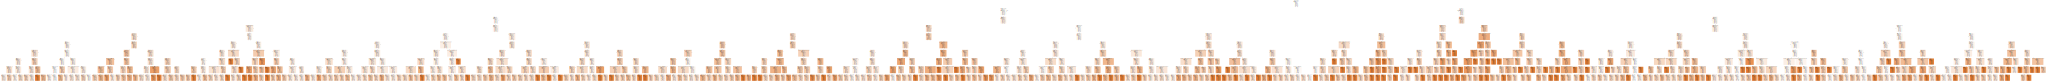

In [96]:
trainY, testY, trainX, testX = model_selection.train_test_split(np.array(mhpDataTargetExpand),
np.array(mhpDataAttrsExpand), test_size=0.2)
clfMhp = sklearn.tree.DecisionTreeRegressor(max_depth=9, min_samples_split=5)
clfMhp = clfMhp.fit(trainX, trainY)
predictions = clfMhp.predict(testX)

mse = metrics.mean_squared_error(testY, predictions)

print(mse)

dotDataMhp = tree.export_graphviz(clfMhp, out_file=None,
                                feature_names=mhpDataAttrsExpand.columns,
                                 class_names=[],
                                 filled=True,
                                 rounded=False,
                                 special_characters=True
                                 )


# mhpTree = tree.DecisionTreeClassifier(criterion="entropy")
# mhpTree = mhpTree.fit(mhpDataAttrsExpand, mhpDataTarget)

# dotDataMhp = tree.export_graphviz(mhpTree, out_file=None,
#                                     feature_names=mhpDataAttrsExpand.columns,
#                                     class_names=['3','4','5','6','7','8'],
#                                     filled=True,
#                                     rounded=False,
#                                     special_characters=True
#                                     )
graph = graphviz.Source(dotDataMhp)
graph